In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install sweetviz 
import sweetviz as sv

In [68]:
dataset= pd.read_csv("C:/Users/pawan/datascience assignment/Simple linear regression/delivery_time.csv")
dataset


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [69]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [70]:
dataset.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [71]:
type(dataset)

pandas.core.frame.DataFrame

In [72]:
dataset.shape

(21, 2)

In [73]:
dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [74]:
dataset.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [75]:
dataset[dataset.duplicated()].shape

(0, 2)

In [76]:
dataset[dataset.duplicated()]

,Delivery Time,Sorting Time


<AxesSubplot:>

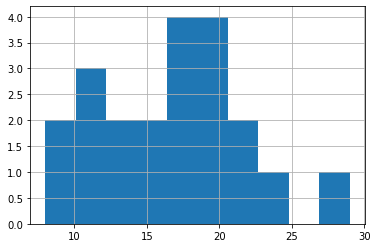

In [77]:
dataset['Delivery Time'].hist()

<AxesSubplot:>

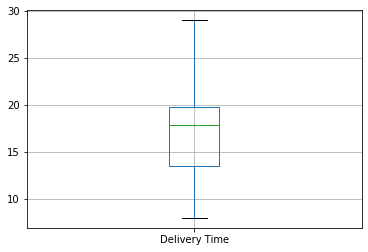

In [78]:
dataset.boxplot(column=['Delivery Time'])

In [79]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [80]:
dataset[dataset.isnull().any(axis=1)]

,Delivery Time,Sorting Time


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


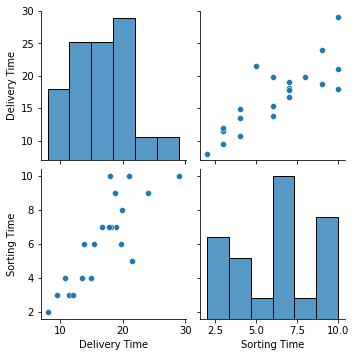

In [82]:
import seaborn as sns
sns.pairplot(dataset)
dataset.corr()

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

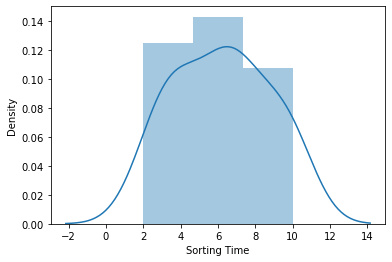

In [94]:
sns.distplot(dataset['Sorting Time'])

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

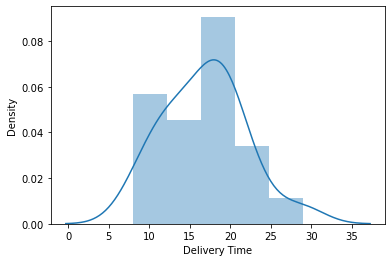

In [95]:
sns.distplot(dataset['Delivery Time'])

In [85]:
import statsmodels.formula.api as smf

In [98]:
model=smf.ols("dataset['Delivery Time']~dataset['Sorting Time']",data=dataset).fit()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

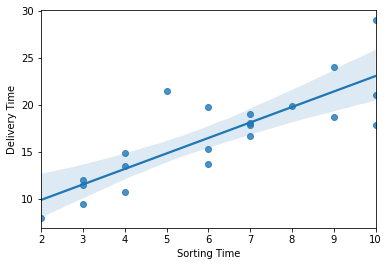

In [102]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=dataset)

In [104]:
model.params

Intercept                  6.582734
dataset['Sorting Time']    1.649020
dtype: float64

In [105]:
print(model.tvalues,'\n',model.pvalues)

Intercept                  3.823349
dataset['Sorting Time']    6.387447
dtype: float64 
 Intercept                  0.001147
dataset['Sorting Time']    0.000004
dtype: float64


In [107]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [108]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
dataset['Sorting Time'],1.108673,2.189367


In [117]:
pred = model.predict(dataset)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64